In [1]:
import json
import h5py
from load_data import *
from model import *
from plotting import *
import tensorflow as tf 
import os
from numpy import sqrt as sqrt

Importamos los ground truth del conjunto de entrenamiento y test. 

In [2]:
json_train = open('JSON FILES\DTS_SG_part_A.json')
json_test = open('JSON FILES\DTS_SG_part_A_TEST.json')
paths_train = json.load(json_train)
paths_test = json.load(json_test)

#Cargamos la data 
train_GT = mLoad_GT(paths_train, n=10)
train_img = mLoad_Img(paths_train, n=10)

test_GT = mLoad_GT(paths_test, n=5)
test_img = mLoad_Img(paths_test, n=5)

Construimos la red neuronal. Este sera un prototipo hasta siguiente cambio

In [18]:
model.build_graph(input_shape).summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 768, 1024, 1)]    0         
                                                                 
 ftgd_conv_layer (FTGDConvLa  (None, 768, 1024, 12)    102       
 yer)                                                            
                                                                 
 activation_5 (Activation)   (None, 768, 1024, 12)     0         
                                                                 
 ftgd_conv_layer_1 (FTGDConv  (None, 768, 1024, 14)    1038      
 Layer)                                                          
                                                                 
 activation_6 (Activation)   (None, 768, 1024, 14)     0         
                                                                 
 ftgd_conv_layer_2 (FTGDConv  (None, 768, 1024, 16)    1374  

In [3]:
#Definimos los sigmas
input_sigma = []
for i in range(5):
    input_sigma.append(0.8*(sqrt(2))**(i))
    
#Definimos el tamaño de nuestra imagen.   
input_shape = train_img[0,:,:,:].shape

#Creamos el modelo
model = Betsy(input_shape= input_shape, input_sigmas= input_sigma, input_kernel_size=(9, 9))


#model.build_graph(input_shape).summary()
#Compliamos el modelo
model.compile(loss = GAME_loss,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), 
              metrics = [sMAE(), RMSE()])

Entrenamos un poco para testeo!

In [4]:
checkpoint_path = "training/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [5]:
batch_size = 10

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model.fit(train_img, 
          train_GT, 
          batch_size = batch_size, 
          epochs = 2, 
          validation_data=(test_img, test_GT)) 
          #callbacks=[cp_callback])

Epoch 1/2
1/1 [==============================] - 269s 269s/step - loss: 148625.3438 - sMAE: 0.0000e+00 - RMSE: 0.0000e+00 - val_loss: 296.0960 - val_sMAE: 0.0000e+00 - val_RMSE: 0.0000e+00
Epoch 2/2
1/1 [==============================] - 214s 214s/step - loss: 453.0987 - sMAE: 0.0000e+00 - RMSE: 0.0000e+00 - val_loss: 296.1187 - val_sMAE: 0.0000e+00 - val_RMSE: 0.0000e+00


In [21]:
tt = model.layers[0].GaussFilters

In [24]:
tt.shape

TensorShape([9, 9, 1, 12])

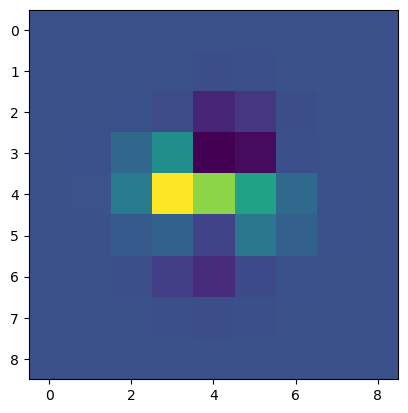

In [28]:
import matplotlib.pyplot as plt
plt.imshow(tt[:,:,0,3])

In [6]:
model.layers[0].deploy()
model.layers[1].deploy()
model.layers[2].deploy()
model.layers[3].deploy()
model.layers[4].deploy()

In [9]:
predict = model(test_img)

In [17]:
import pandas as pd
dd = pd.DataFrame(predict[0,:,:,0])
dd.to_excel('rr.xlsx')

In [10]:
predict.shape

TensorShape([5, 768, 1024, 1])

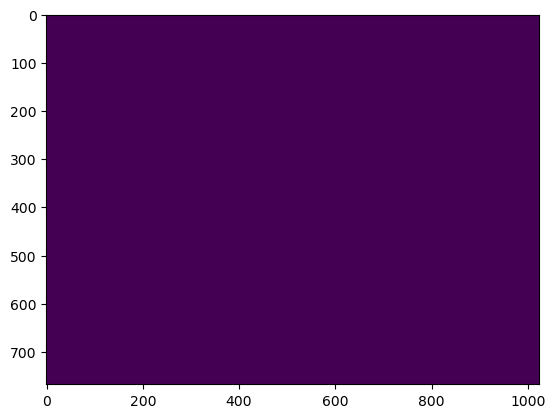

In [19]:
import matplotlib.pyplot as plt
plt.imshow(predict[0,:,:,:])

In [2]:
from numpy import sqrt as sqrt
input_sigma = []
for i in range(5):
    input_sigma.append(0.8*(sqrt(2))**(i))

input_sigma

[0.8,
 1.1313708498984762,
 1.6000000000000005,
 2.2627416997969525,
 3.200000000000001]